# Loading Libraries and Initialize

In [1]:
%%capture
%run -i 1-ReadingData.ipynb

# Simple Linear Regression
Linear regression assumes a linear or straight line relationship between the input variables $x_i$ and the single output variable $y_i$.

### Goal
The goal is to find a straight line which has the minimum error.

\begin{align}
\large
y_i = b_0 + b_1 x_i
\end{align}

- $b_0$ is intersection of regression line with $y$ axis.
- $b_1$ is slope of the regression line.

### What is minimum error?

<img src="https://raw.githubusercontent.com/pournasserian/TimeSeries/master/Images/r-squared-graph.png">

If we iterate in sample data, we will have a residual (error) for each $x_i$ which shows the distance of the line.

So, we can represent the line formula with error as below:

\begin{align}
\large
y_i = b_0 + b_1 x_i + \epsilon_i
\end{align}

Now, we have to find $b_0$ and $b_1$. What are the best values for $b_0$ and $b_1$?

We define Cost function or Error function as below:

\begin{align}
\large
MSE = \frac {1} {n} \displaystyle\sum_{i=1}^{n} (y_i-\hat{y_i})^2 = \frac {1} {n} \displaystyle\sum_{i=1}^{n} (y_i-(b_0 + b_1 x_i))^2
\end{align}

We have to fine $b_0, b_1$ which minimize the error.



In [2]:
def compute_error_for_line_given_points(b0, b1, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (b1 * x + b0)) ** 2
    return totalError / float(len(points))

# Approach 1: Normal Equation


\begin{align}
\large
b_1 = \frac {\displaystyle\sum_{i=1}^{n}(x_i - \bar{x})  (y_i - \bar{y})} {\displaystyle\sum_{i=1}^{n}(x_i - \bar{x})^2} = \frac {Cov(x,y)} {Var(x)}
\end{align}

\begin{align}
\large
b_0 = \bar{y} - b_1 \bar{x}
\end{align}

In [3]:
x = np.arange(len(df))
y = df['close']
cov = pd.DataFrame({'x': x, 'y': y}).cov()
print('Covariance Result')
print('------------------------------')
print(cov)
b1 = cov['x']['y'] / x.var()
b0 = y.mean() - b1 * x.mean()
print('------------------------------')
print('b0 (Intersection)',b0)
print('b1 (Slope)', b1)
df['slr'] = b0 + b1 * x

Covariance Result
------------------------------
               x            y
x  132195.000000  9786.514744
y    9786.514744   933.718740
------------------------------
b0 (Intersection) 62.464247328779386
b1 (Slope) 0.07408974747549514


## Calculating Error

In [4]:
points = np.zeros((len(df), 2))
points[:,0] = np.arange(len(df))
points[:,1] = df['close']

print('The error for the line is:', compute_error_for_line_given_points(b0, b1, points))

The error for the line is: 209.0485340267226


## Visualizing All Data

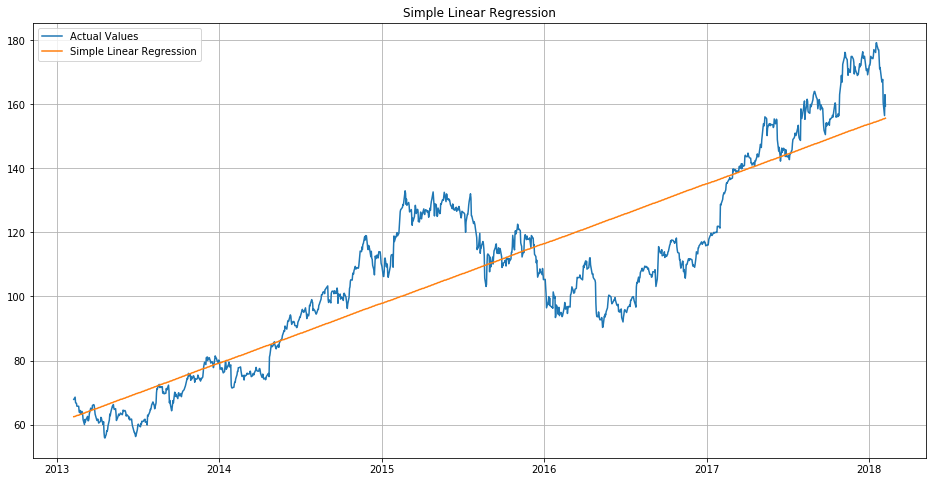

In [5]:
plt.figure(figsize=(16,8))
plt.title('Simple Linear Regression')

plt.plot(df['close'], label='Actual Values')
plt.plot(df['slr'], label='Simple Linear Regression')

plt.legend(loc='upper left')
plt.grid(True)
plt.show()

## Visualizing Last 200 Days

Covariance Result
------------------------------
             x           y
x  3350.000000  497.913291
y   497.913291  105.017961
------------------------------
b0 (Intersection) 144.90156667291672
b1 (Slope) 0.1493777218802329


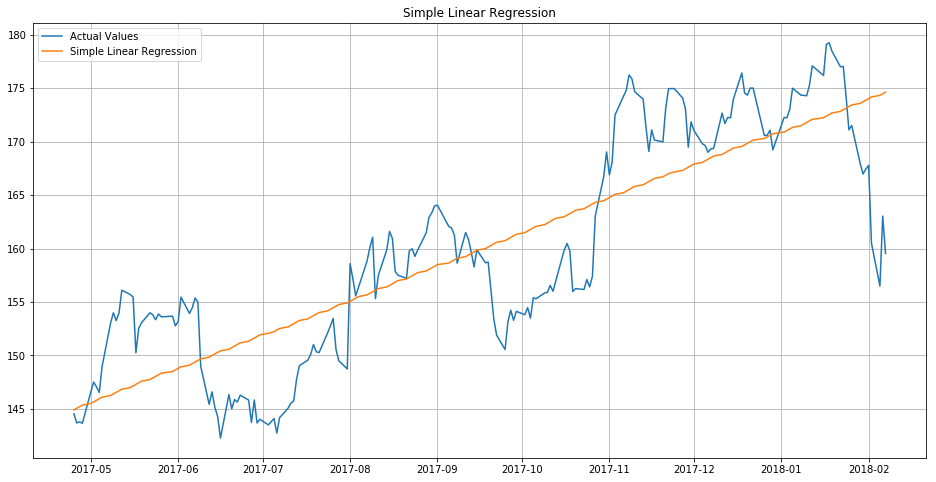

In [6]:
df1 = df[-200:]

x = np.arange(len(df1))
y = df1['close']
cov = pd.DataFrame({'x': x, 'y': y}).cov()
print('Covariance Result')
print('------------------------------')
print(cov)
b1 = cov['x']['y'] / x.var()
b0 = y.mean() - b1 * x.mean()
print('------------------------------')
print('b0 (Intersection)',b0)
print('b1 (Slope)', b1)
df1['slr'] = b0 + b1 * x

plt.figure(figsize=(16,8))
plt.title('Simple Linear Regression')

plt.plot(df1['close'], label='Actual Values')
plt.plot(df1['slr'], label='Simple Linear Regression')

plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Approach 2: Gradient Descent

We minimized $Error$ function by trial and error above — just trying lots of values and visually inspecting the resulting graph. There must be a better way: Gradient Descent. Gradient Descent is a general function for minimizing a function, in this case the Mean Squared Error cost function.

<img src="https://raw.githubusercontent.com/pournasserian/TimeSeries/master/Images/gradient_descent_example.gif">

Gradient Descent basically just does what we were doing by hand — change the $b_0, b_1$ values, or parameters, bit by bit, until we hopefully arrived a minimum.

First, we should calculate the derivative with respect to each parameter $b_0, b_1$ as below:
\begin{align}
\large
\frac {\partial } {\partial b_0} = \frac {-2} {n} \displaystyle\sum_{i=1}^{n} (y_i-(b_0 + b_1 x_i))\\
\large
\frac {\partial } {\partial b_1} = \frac {-2} {n} \displaystyle\sum_{i=1}^{n} x_i(y_i-(b_0 + b_1 x_i))
\end{align}

The Gradient Descent calculation steps will be as below:

- Assign initial zero (or random) values for $b_0, b_1$

\begin{align}
\large
b_0 = 0\ or\ Random\ Number \\
\large
b_1 = 0\ or\ Random\ Number
\end{align}

- Repeat until convergence:

\begin{align}
\large
b_0 := b_0 - \alpha \frac {2} {n} \displaystyle\sum_{i=1}^{n} ((b_0 + b_1 x_i) - y_i)  \\
\large
b_1 := b_1 - \alpha \frac {2} {n} \displaystyle\sum_{i=1}^{n} x_i((b_0 + b_1 x_i) - y_i)
\end{align}

- $\alpha$ is a small number like 0.0003 which we call it: "Learning Rate". If we pick $\alpha$ too small, we need more calculatioin steps to converge. If $\alpha$ is too big, it will nerver converge. 

In [41]:
def gradient_descent_runner(points, starting_b0, starting_b1, learning_rate, num_iterations):
    b0 = starting_b0
    b1 = starting_b1
    for i in range(num_iterations):
        b0, b1 = step_gradient(b0, b1, points, learning_rate)
        if (i % 1000 == 0):
            print(i, b0, b1, compute_error_for_line_given_points(b0, b1, points))
    return [b0, b1]

def step_gradient(b0_current, b1_current, points, learningRate):
    b0_gradient = 0
    b1_gradient = 0
    n = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b0_gradient += -(2/n) * (y - ((b1_current * x) + b0_current))
        b1_gradient += -(2/n) * x * (y - ((b1_current * x) + b0_current))
        
    new_b0 = b0_current - (learningRate * b0_gradient)
    new_b1 = b1_current - (learningRate * b1_gradient)
    return [new_b0, new_b1]

In [42]:
points = np.zeros((len(df), 2),dtype=np.dtype(float))
points[:,0] = np.arange(len(df))
points[:,1] = df['close']

points[:,0] = (points[:,0] - points[:,0].mean()) / points[:,0].std()
points[:,1] = (points[:,1] - points[:,1].mean()) / points[:,1].std()

learning_rate = 0.001
initial_b0 = 0.0 # initial y-intercept guess
initial_b1 = 0.0 # initial slope guess
num_iterations = 10000

print("Starting gradient descent at b0 = {0}, b1 = {1}, error = {2}".format(initial_b0, initial_b1, compute_error_for_line_given_points(initial_b0, initial_b1, points)))
print("Running...")
[b0, b1] = gradient_descent_runner(points, initial_b0, initial_b1, learning_rate, num_iterations)
print("After {0} iterations b0 = {1}, b1 = {2}, error = {3}".format(num_iterations, b0, b1, compute_error_for_line_given_points(b0, b1, points)))

Starting gradient descent at b0 = 0.0, b1 = 0.0, error = 1.0000000000000016
Running...
0 -5.780965983692709e-19 0.0017617427712572093 0.9968993661455146
1000 -2.5510908489845273e-16 0.7621348615378016 0.23816396413390822
2000 -3.1147865319977596e-16 0.8648342937053008 0.2243227902980986
3000 -3.2591851851886114e-16 0.8787053434665502 0.22407029371939005
4000 -3.3251634952435774e-16 0.8805788301783872 0.2240656875694336
5000 -3.3259807126310887e-16 0.8808318717664317 0.22406560354208746
6000 -3.3094680424935967e-16 0.8808660487076808 0.2240656020092247
7000 -3.3278086774939043e-16 0.8808706647999279 0.22406560198126177
8000 -3.3145803267874067e-16 0.8808712882702237 0.22406560198075168
9000 -3.3335909987303113e-16 0.8808713724789418 0.22406560198074238
After 10000 iterations b0 = -3.3251805714277975e-16, b1 = 0.8808713838489921, error = 0.22406560198074224


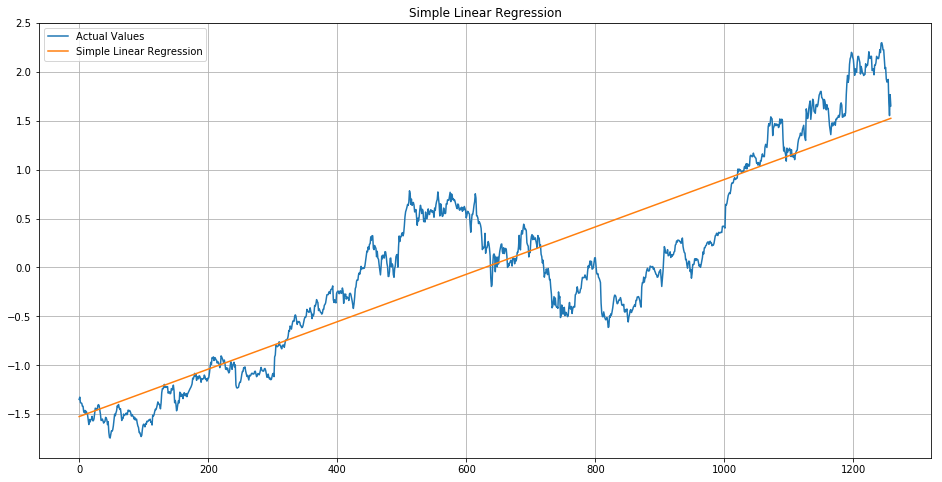

In [44]:
df['slr'] = b0 + b1 * np.arange(len(df)) 

plt.figure(figsize=(16,8))
plt.title('Simple Linear Regression')

plt.plot(points[:,1], label='Actual Values')
plt.plot(b0 + b1 * points[:,0], label='Simple Linear Regression')

plt.legend(loc='upper left')
plt.grid(True)
plt.show()